In [1]:
from gp import *

In [2]:
input_file = '../training_results/1D_500/train_inputs.json'
var_file = '../training_results/1D_500/train_outputs_var.json'
output_file = '../training_results/1D_500/train_outputs_mean.json'
input_type = 'I'
output_type = 'T'


In [3]:
gp = LPI_GP_1D(input_file = input_file, input_type = input_type, output_file = output_file, output_type = output_type, var_file = var_file)

In [4]:
gp.optimise_noise_GP()

l =  0.011513953993264481 var =  0.029470517025518096


In [5]:
gp.optimise_GP()

l =  0.21544346900318834 var =  12.915496650148826


In [6]:
X_star = np.geomspace(1e13, 1.1e16, 500)[:,None]


Y_star, sig_epi, sig_noise = gp.GP_predict(X_star, get_std=True)

In [7]:
X = gp.get_input()
Y = gp.get_output()

In [8]:
X_all = read_json_file('../training_results/1D_500/all_inputs.json')
Y_all = read_json_file('../training_results/1D_500/all_outputs.json')


In [9]:
if input_type == 'I':
    X_all = X_all[:,0]
if input_type == 'Ln':
    X_all = X_all[:,1]

if output_type == 'P':
    Y_all = Y_all[:,0].flatten()
if output_type == 'T':
    Y_all = Y_all[:,1].flatten()
if output_type == 'E':
    Y_all = Y_all[:,2].flatten()


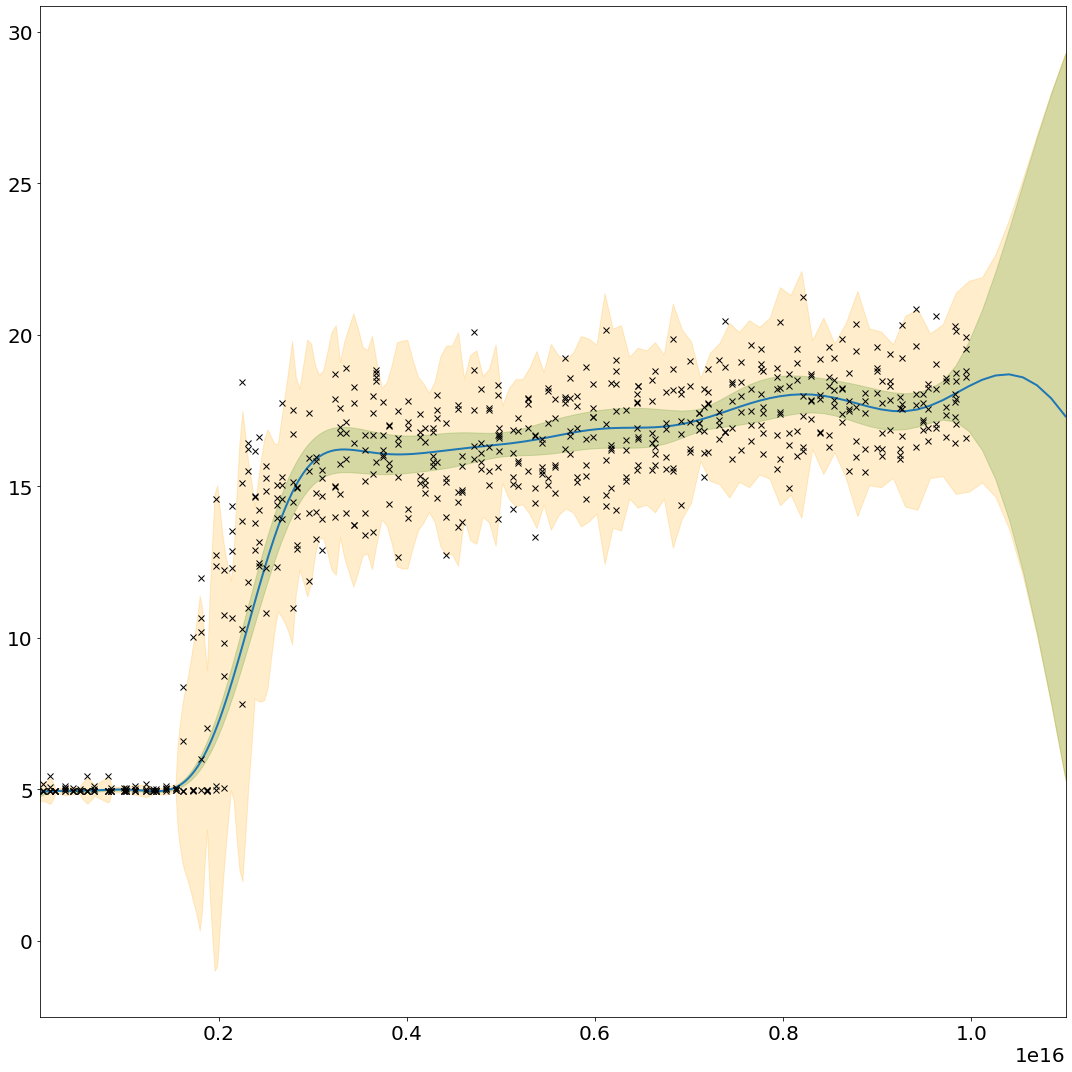

In [10]:
error_epi = 2*sig_epi
error_tot = 2*(sig_noise+sig_epi)
Y_s = Y_star.flatten()
X_s = X_star.flatten()
if output_type == 'P':
    plt.loglog(X_s, Y_s*X_s)
    plt.fill_between(X_s, (Y_s-error_epi)*X_s, (Y_s+error_epi)*X_s, alpha = 0.2, color = 'green')
    plt.fill_between(X_s, (Y_s-error_tot)*X_s, (Y_s+error_tot)*X_s, alpha = 0.2, color = 'orange')
    plt.plot(X_all, Y_all*X_all, 'kx')
else:
    plt.plot(X_s, Y_s)
    plt.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.2, color = 'green')
    plt.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.2, color = 'orange')
    plt.plot(X_all, Y_all, 'kx')
    plt.xlim(1e14, 1.1e16)

 <ipython-input-11-2a6e71518f2f>:4: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
 <ipython-input-11-2a6e71518f2f>:5: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.


(100000000000000.0, 1.1e+16)

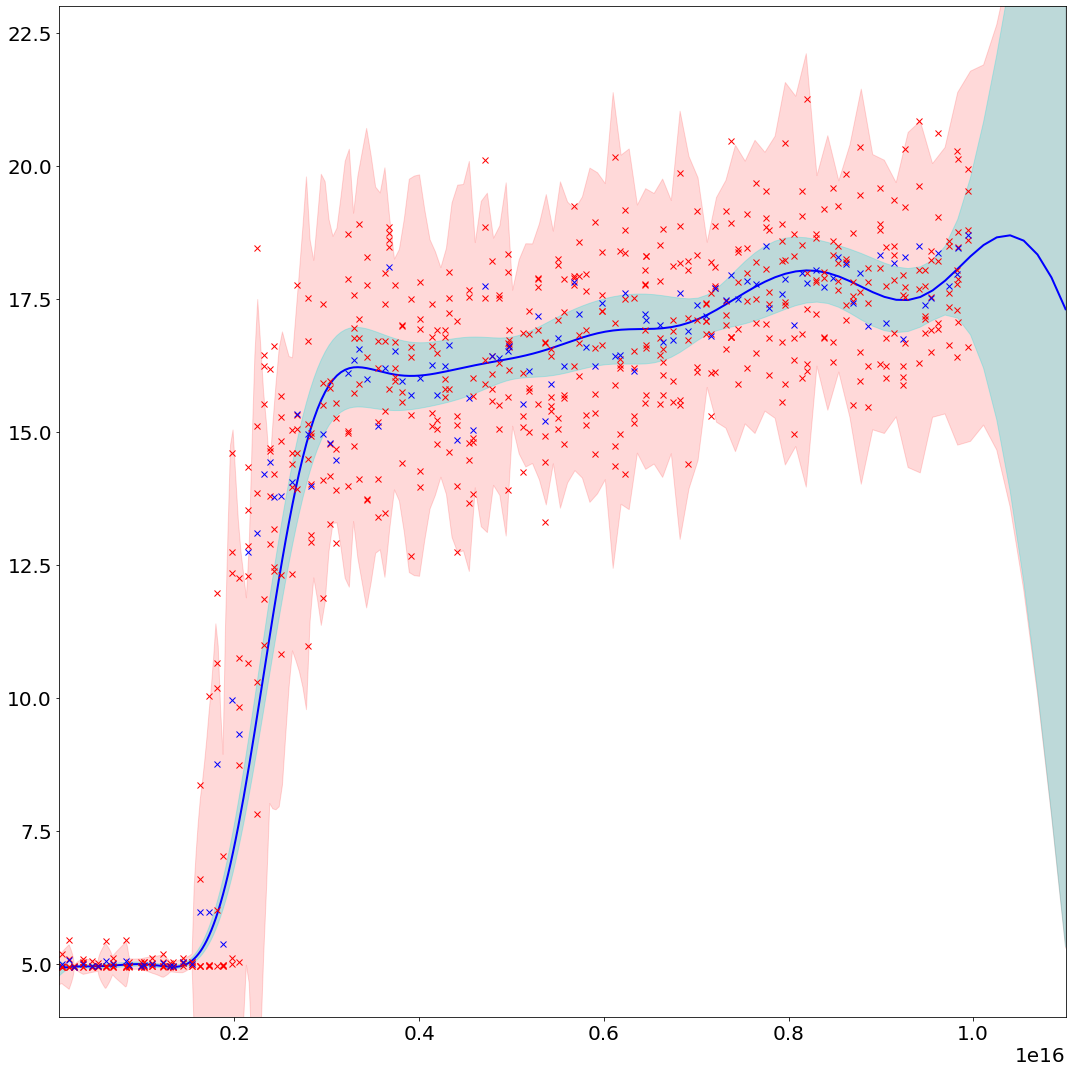

In [11]:
plt.plot(X_s, Y_s, color = 'blue')
plt.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan')
plt.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red')
plt.plot(X_all, Y_all, 'kx', alpha = 1.0, color = 'red')
plt.plot(X, Y, 'kx', color = 'blue')
plt.ylim(4, 23)
plt.xlim(1e14, 1.1e16)